# Calculate beam intensity and resolution vs FC freq

    fluxmode:
      High Flux (HF)    = 9.0 deg
      Intermidiste (AI) = 4.4 deg
      High Res (HR)     = 2.0 deg
    Frequency DoubleDisk Chopper 1: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR
    Frequency DoubleDisk Chopper 2: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR


In [1]:
import os, sys, numpy as np
import histogram.hdf as hh, histogram as H
import mcvine, mcvine.components, mcvine.run_script
from mcni.utils import conversion as C

from matplotlib import pyplot as plt
%matplotlib notebook

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
workdir = os.path.expanduser("/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV")
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV


In [3]:
sys.path.insert(0, os.path.abspath('../../PyChop/'))

In [4]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop/Vdata2018.pyc'>

In [5]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))

reading data. please wait...
  done


In [16]:
# expdata_highres.vdata

# Sample

Hieght=63mm

In [6]:
%%file ./sampleassembly.xml
<SampleAssembly name="bcc V powder sample assembly">

  <PowderSample name="V" type="sample">
    <Shape>
      <hollowCylinder in_radius="5*mm" out_radius="6*mm" height="63*mm"  />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>V</ChemicalFormula>
      <xyzfile>V.xyz</xyzfile>
    </Phase>
  </PowderSample>

  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="V" position="(0,0,0)" orientation="(0,0,0)"/>
  </LocalGeometer>

</SampleAssembly>

Writing ./sampleassembly.xml


# Function

Be careful to choose dE_axis. The step size should be small enough

# Test one freq

In [18]:
Ei = 20.
E,Q = 0, 3.
dQ_axis=(-.5, .5, 0.01)
dE_axis=(-1, 1, .01)

In [10]:
# run(Ei=Ei, fluxmode=2.0, freq=180., E=E, Q=Q, dQ_axis=dQ_axis, dE_axis=dE_axis)

In [41]:
Ei,fluxmode = 20., 2.0
# beam_dir = os.path.abspath('beam-Ei_%s-fluxmode_%s' % (Ei, fluxmode))
beam_dir = '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV_AnalyticMod_MoreCounts/beam-Ei_20-fluxmode_2.0/'
beam_dir = '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV_InterpMod_MoreCounts/beam-Ei_20-fluxmode_2.0/'
ncount=1e7
nodes = 20

In [98]:
# rm -rf resolution_analytical_moderator-Ei_2

In [42]:
workdir = os.path.abspath("./resolution_analytical_moderator-Ei_%s-fluxmode_%s-E,Q_%s,%s" % (Ei, fluxmode, E, Q))
# workdir = os.path.abspath("./resolution_interped_moderator-Ei_%s-fluxmode_%s-E,Q_%s,%s" % (Ei, fluxmode, E, Q))

In [27]:
from dgsres.powder import  use_ConstantQEKernel
sim = use_ConstantQEKernel.Sim(
    instrument = 'CNCS',
    workdir = workdir,
    beamdir = beam_dir,
    Ei = Ei,
    Q = Q,
    dQ_axis=dQ_axis,
    dE_axis=dE_axis,
    ncount = ncount,
    nodes = nodes,
    )

In [28]:
cp ./sampleassembly.xml {workdir}/res-sim/sampleassembly

In [29]:
%%time
sim.run(E=E)

CPU times: user 57.1 ms, sys: 36.9 ms, total: 94 ms
Wall time: 4min 20s


In [30]:
%matplotlib notebook

In [ ]:
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV/resolution_analytical_moderator

-rw-r--r-- 1 lj7 users 63K Nov 30 15:10 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_20meV/resolution_analytical_moderator-Ei_20.0-fluxmode_2.0-E,Q_0,3.0/res-sim/iqe.h5
plot z in (0.0, 0.00019445891637981532)


<IPython.core.display.Javascript object>


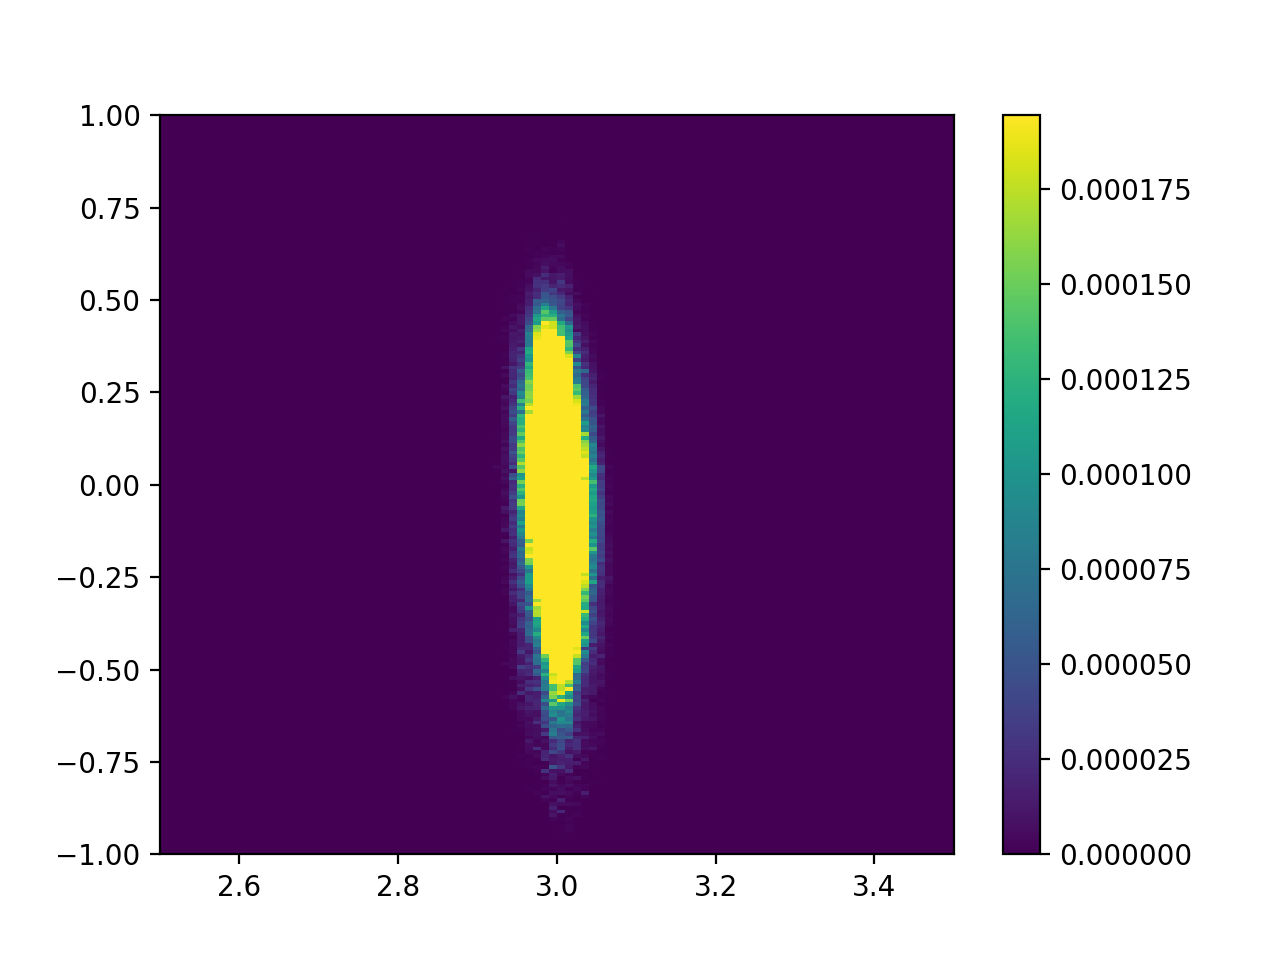

In [45]:
!ls -lh {workdir}/res-sim/iqe.h5
iqe = hh.load('%s/res-sim/iqe.h5' % workdir)
iqe.I[iqe.I!=iqe.I]=0
H.plot(iqe)

<IPython.core.display.Javascript object>


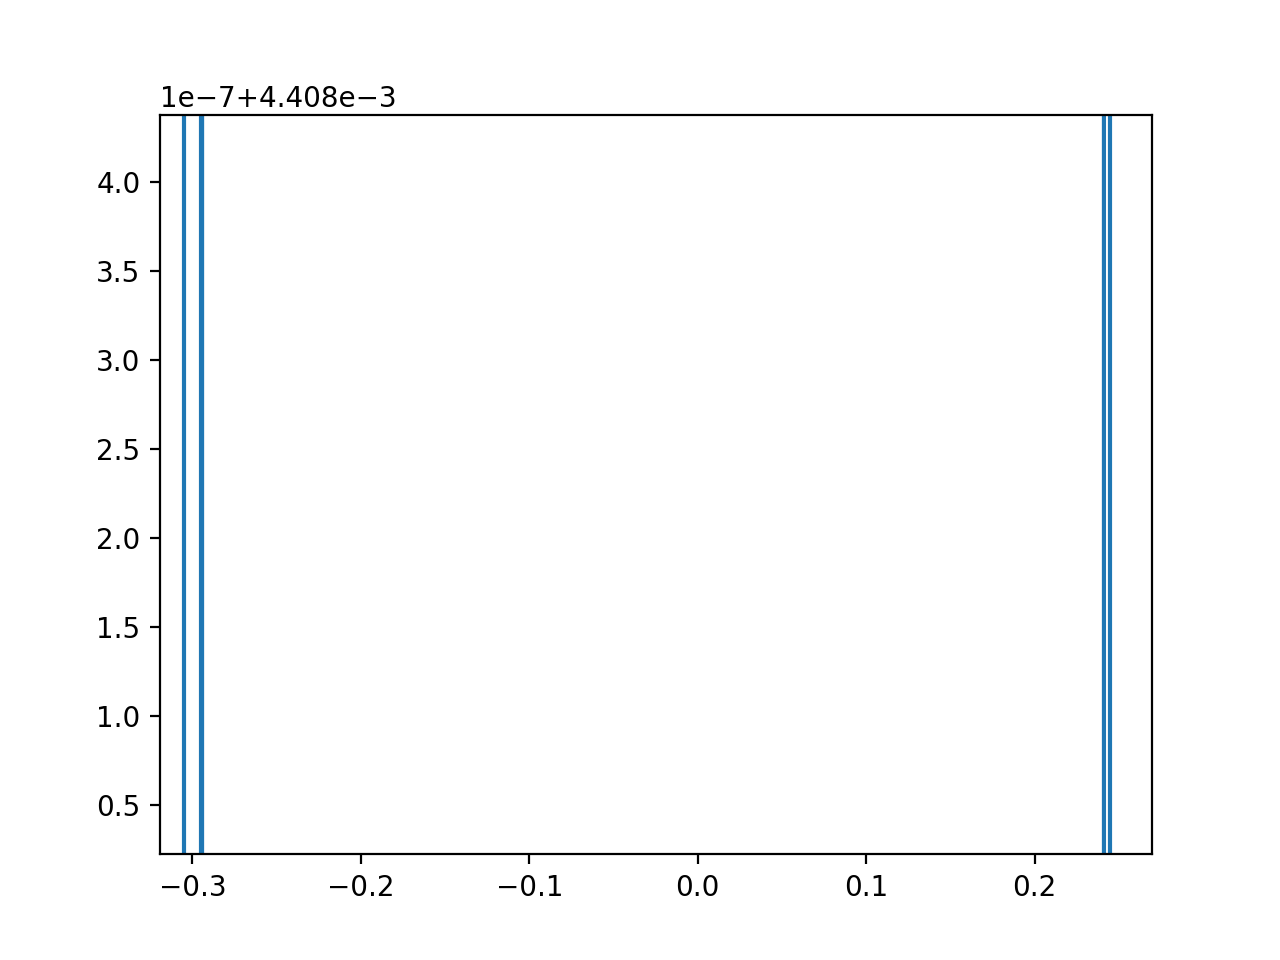

In [46]:
ie = iqe.sum('Q')
H.plot(ie)

    FHWM = 0.54 for analytical
    FWHM = 0.52 for interpolated